In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [6]:
add_op = a + b

In [11]:
mul_op = a * b

In [13]:
with tf.Session() as sess:
    print(sess.run(add_op,feed_dict={a:rand_a,b:rand_b}))
    
    print("\n")
    
    print(sess.run(mul_op,feed_dict={a:rand_a,b:rand_b}))

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Tensorflow Basic NN

In [14]:
n_features = 10
n_dense_neurons = 3

In [15]:
# shape of is x is (n_training_examples, n_features)
x = tf.placeholder(tf.float32,shape=(None,n_features))

In [16]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [17]:
b = tf.Variable(tf.ones([n_dense_neurons])) 

In [29]:
Wx = tf.matmul(x,W)

In [30]:
z = tf.add(Wx,b)

In [31]:
a = tf.sigmoid(z)

In [32]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    
    print(layer_out)

[[ 0.87198943  0.836357    0.98441434]]


# Simple Regression

In [45]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ -0.33440618,   2.43788898,   2.93169622,   2.5487265 ,
         5.41576563,   6.33739589,   6.35079389,   6.87834153,
         9.52667831,  11.03592669])

In [46]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([-0.39406038,  0.92205147,  1.79201522,  2.55254555,  4.90457887,
        5.22687316,  7.14001572,  7.36459784,  8.45839493,  9.0857548 ])

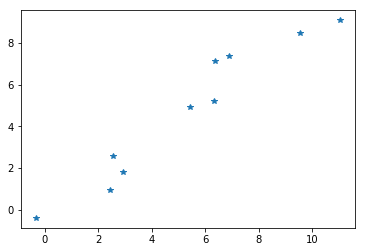

In [49]:
plt.plot(x_data,y_label,'*')

In [53]:
np.random.rand(2)

array([ 0.54808045,  0.56090789])

In [54]:
m = tf.Variable(0.54)
b = tf.Variable(0.59)

In [ ]:
error = 0

